In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [37]:
state_data = pd.read_csv('state_data.csv')

In [38]:
x = np.array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]).reshape(-1,1)
mask = [1, 1, 1, 1, 1, 1, 1, 1]

In [39]:
state_data['women'] = 0
state_data['reserved'] = 0

In [40]:
women = []
reserved = []
for index, row in state_data.iterrows():
    y = [row['2004_women'], row['2005_women'],row['2006_women'],row['2007_women'],row['2008_women'], row['2009_women'],row['2010_women'],row['2011_women']]
    y1 = []
    for elem in y:
        y1.append(round(elem/row['women_population'] * 100 , 2))
    women.append(LinearRegression().fit(x,y1).coef_[0])
    y = [row['2004_res'], row['2005_res'],row['2006_res'],row['2007_res'],row['2008_res'], row['2009_res'],row['2010_res'],row['2011_res']]
    y1 = []
    for elem in y:
        y1.append(round(elem/row['res_population'] * 100 , 2))
    reserved.append(LinearRegression().fit(x,y1).coef_[0])


In [41]:
state_data['women'] = women
state_data['reserved'] = reserved

In [42]:
%%capture
!pip install geopandas

import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 

In [43]:
shp_gdf = gpd.read_file('Igismap/Indian_States.shp')
shp_gdf.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [44]:
plot_data = pd.DataFrame()
plot_data['State'] = shp_gdf['st_nm']
plot_data['geometry'] = shp_gdf['geometry']

In [45]:
plot_data['State'] = [elem.replace("Andaman & Nicobar Island","Andaman and Nicobar Islands") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("&","and") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Havelli","Haveli") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Lakshadweep","Lakshadweep Islands") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("NCT of Delhi","Delhi") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Puducherry","Pondicherry") for elem in plot_data['State']]

plot_data['State'] = [elem.replace("Arunanchal Pradesh","Arunachal Pradesh") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Chhattisgarh","Chattisgarh") for elem in plot_data['State']]
plot_data['State'] = [elem.replace("Dadara and Nagar Haveli","Dadra and Nagar Haveli") for elem in plot_data['State']]



In [46]:
merged = plot_data.set_index('State').join(state_data.set_index('State'))

In [47]:
from geopandas import GeoDataFrame

merged = GeoDataFrame(merged)

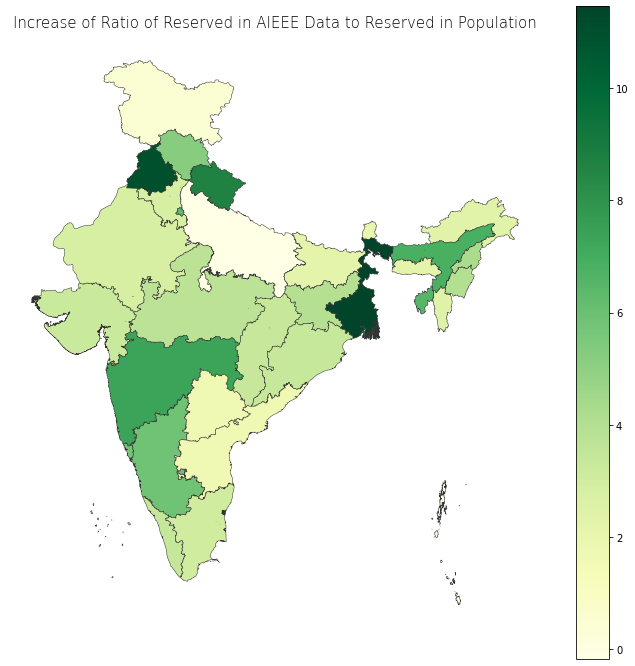

In [48]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Increase of Ratio of Reserved in AIEEE Data to Reserved in Population',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig1 = merged.plot(column='reserved', cmap='YlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig.savefig("india_map_reserved_ratio_increase.png", dpi=100)

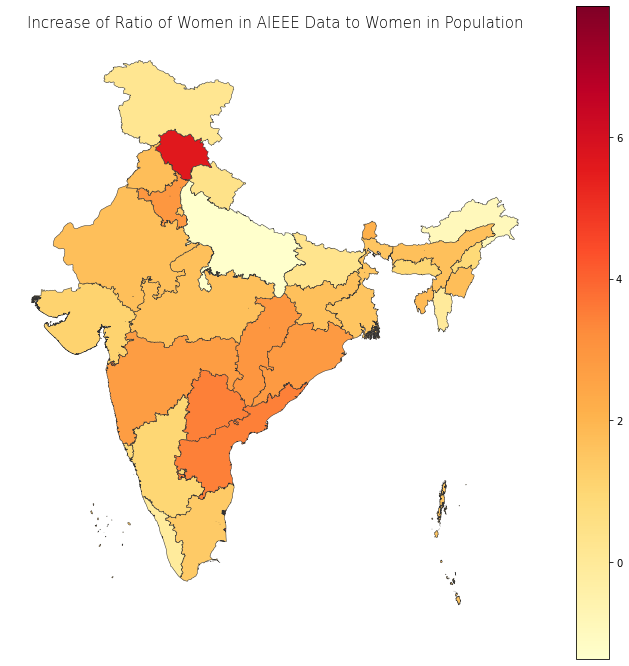

In [49]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Increase of Ratio of Women in AIEEE Data to Women in Population',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig1 = merged.plot(column='women', cmap='YlOrRd', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig.savefig("india_map_women_ratio_increase.png", dpi=100)

In [17]:
display = pd.DataFrame()
display['State'] = state_data['State']
display['women'] = state_data['women']
display['res'] = state_data['reserved']

In [18]:
display.sort_values(by='women').head()

,State,women,res
28,Uttar Pradesh,-0.623690,-0.146190
14,Arunachal Pradesh,-0.427024,1.848810
23,Kerala,-0.049167,2.706190
32,Mizoram,-0.031667,1.649881
12,Jammu and Kashmir,0.091071,0.147024


In [19]:
display.sort_values(by='women').tail()

,State,women,res
33,Andhra Pradesh,1.720952,1.287262
35,Telangana,1.720952,1.287262
20,Daman and Diu,2.423810,7.027857
19,Pondicherry,2.724881,2.692262
29,Himachal Pradesh,2.740476,2.347381


In [20]:
display.sort_values(by='res').head()

,State,women,res
28,Uttar Pradesh,-0.623690,-0.146190
10,Andaman and Nicobar Islands,0.652976,0.086071
12,Jammu and Kashmir,0.091071,0.147024
35,Telangana,1.720952,1.287262
33,Andhra Pradesh,1.720952,1.287262


In [21]:
display.sort_values(by='res').tail()

,State,women,res
15,Uttarakhand,0.204048,4.777381
7,Karnataka,0.474643,5.128810
34,West Bengal,0.724881,5.154048
2,Punjab,0.774286,5.617262
20,Daman and Diu,2.423810,7.027857
